### 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.05,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# df.isna().sum()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
# 채워넣을거면 fillna, 없앨거면 dropna

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 안에 뭐가 있는지 확인하고 번호인덱스 붙여줘야겠쥬
df['Sex'].value_counts()
# df['Sex'].unique()는 male female만 나오는데 value_count는 몇개인지까지 나오는군

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Cabin'].value_counts()
# df['Cabin'].unique()


N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [11]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [12]:
df['Cabin'] = df['Cabin'].str[:1]

In [13]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

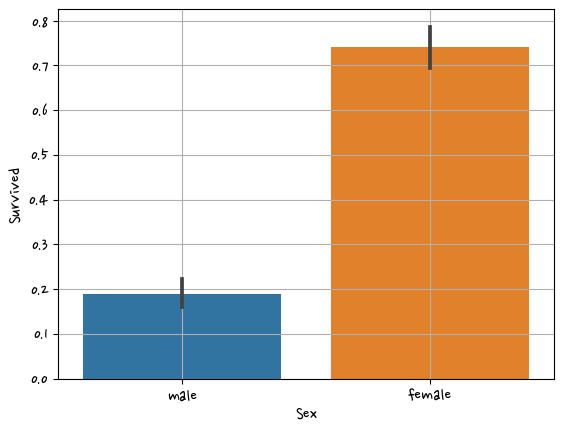

In [14]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.grid(True)

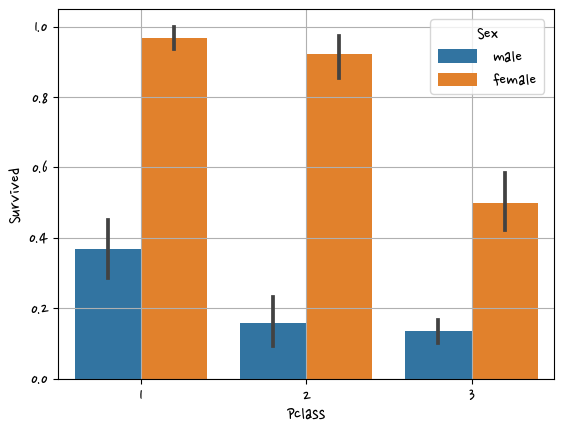

In [15]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.grid(True)

In [16]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [17]:
def get_category(age):
    cat = ''
    if age <= -1 : cat='Unkonwn'
    elif age <= 5 : cat='Baby'
    elif age <= 12 : cat='Child'
    elif age <= 18 : cat='Teenager'
    elif age <= 25 : cat='Student'
    elif age <= 35 : cat='Young Adult'
    elif age <= 60 : cat='Adult'
    else: cat='Elderly'
    return cat
    

In [18]:
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

# Age 값이 lambda x 에 들어가고 x 값이 get_category에 들어가서 get_category 함수가 실행

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

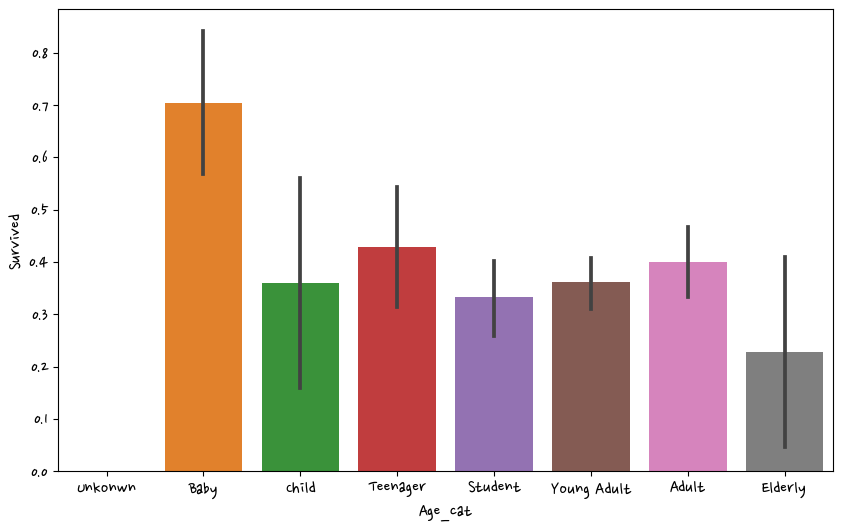

In [19]:
plt.figure(figsize=(10,6))

group_name = ['Unkonwn', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

sns.barplot(data=df, x=df['Age_cat'], y=df['Survived'], order=group_name) # group_name 순서로 정렬
# sns.barplot(data=df, x=df['Age_cat'], y=df['Survived'])

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

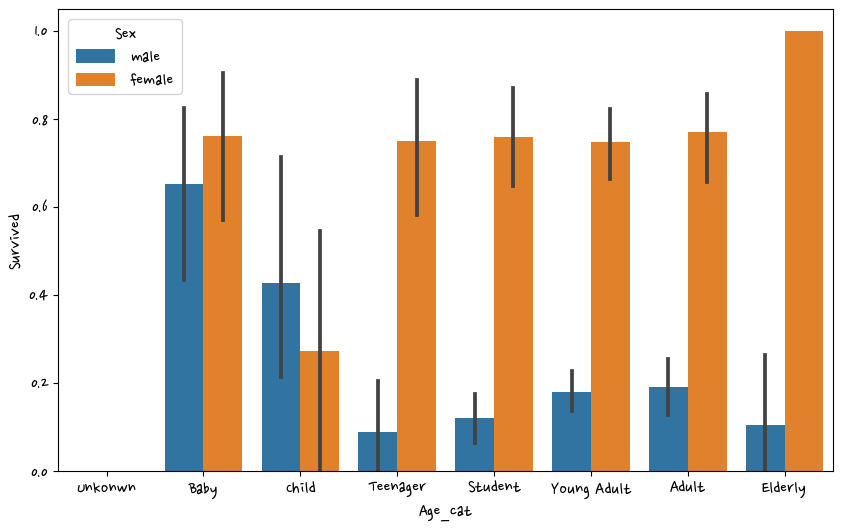

In [20]:
plt.figure(figsize=(10,6))

sns.barplot(data=df, x=df['Age_cat'], y=df['Survived'], order=group_name, hue = 'Sex') # group_name 순서로 정렬


In [21]:

from sklearn.preprocessing import LabelEncoder

In [22]:
def encode_features(df):
    features = ['Sex', 'Cabin', 'Embarked']# 레이블 인코딩 하려는 거 적ㄱ기
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

In [23]:
df = encode_features(df)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [28]:
# 타이타닉 데이터 또 갖다 쓸 때를 댇비해서 함수 만들어놓기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True) 
    df['Cabin'].fillna('N', inplace=True) 
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df


def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']# 레이블 인코딩 하려는 거 적ㄱ기
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [31]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 생존이냐 사망이냐 하는 거니까 이진분류

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # solver='liblinear' 이거 머여??


In [41]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)

0.7877094972067039

In [42]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.8547486033519553

In [43]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8659217877094972

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param = {
    'max_depth' : [2,3,5,10], 
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8]
}


# 'min_samples_leaf 리프노드가 되기위한 최소 샘플의 수
# 마지막 동그라미에 최소 몇개의 데이터가 들어가잇어야 하냐 그건가?

In [46]:
grid = GridSearchCV(dt_clf, param_grid=param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [47]:
pred = grid.predict(X_test)

In [48]:
accuracy_score(y_test, pred)

0.8715083798882681

In [49]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [51]:
# grid.cv_results_
df = pd.DataFrame(grid.cv_results_)

In [52]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002705,0.000401,0.001210,3.892509e-04,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
1,0.003570,0.000637,0.002200,7.657923e-04,2,1,3,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
2,0.001810,0.000367,0.000989,3.707347e-05,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
3,0.003195,0.001158,0.002199,7.341031e-04,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
4,0.003002,0.000623,0.001569,4.862625e-04,2,5,3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
5,0.003042,0.000953,0.001297,6.008594e-04,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
6,0.003380,0.001378,0.002419,5.175344e-04,2,8,2,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
7,0.002547,0.000480,0.001791,4.211344e-04,2,8,3,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
8,0.001989,0.000043,0.001164,4.637348e-04,2,8,5,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
9,0.002596,0.000761,0.001407,5.190718e-04,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.790210,0.797203,0.830986,0.802817,0.774648,0.799173,0.018499,4
